In [1]:
import sys

sys.path.insert(0, '/Users/Cinus/Work/Progetti/WoMG/WoMG/src/')
import test_version

/Users/Cinus/Work/Progetti/WoMG/WoMG/src/test_version


In [2]:
import numpy as np
from test_version import womg
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
N = 100
g = nx.random_geometric_graph(N, .2)
docs_path = '../womg/womgdata/docs/demo_corpus/'
prop = womg(graph=g, int_mode='nmf', homophily=0., virality_resistance=13, virality_exp=8., 
          infl_strength=12., gn_strength=13,
          docs_path=docs_path, save_int=True, seed=42, single_activator=False)

Formatting graph..
Creating interests..
Extracting topic distribution from docs in  ../womg/womgdata/docs/demo_corpus


100%|██████████| 2/2 [00:00<00:00, 308.12it/s]

Computing cascades.. 
WoMG diffusion has been completed.


In [9]:
prop.docs

[{'reported': 1,
  'said': 3,
  'defense': 1,
  'embassy': 3,
  'emergency': 2,
  'france': 1,
  'general': 1,
  'government': 1,
  'killed': 2,
  'left': 2,
  'office': 2,
  'people': 3,
  'press': 2,
  'saturday': 1,
  'state': 1,
  'united': 1,
  'visited': 1,
  'announced': 1,
  'include': 1,
  'north': 1,
  'offered': 2,
  'states': 1,
  'addition': 1,
  'aid': 1,
  'city': 1,
  'countries': 1,
  'days': 1,
  'homeless': 2,
  'living': 1,
  'money': 2,
  'world': 1,
  'friday': 2,
  'miles': 1,
  'help': 1,
  'families': 1,
  'louis': 1,
  'officials': 2,
  'italy': 1,
  'victims': 1,
  'expected': 1,
  'affected': 1,
  'fund': 2,
  'total': 1,
  'provide': 2,
  'gov': 1,
  'caused': 1,
  'provided': 1,
  'check': 2,
  'britain': 1,
  'funds': 1,
  'civil': 1,
  'nicaragua': 1,
  'supplies': 2,
  'seriously': 1,
  'mountain': 1,
  'citizens': 1,
  'rains': 1,
  'brazil': 2,
  'consulate': 1,
  'resort': 1,
  'flooding': 1,
  'moreira': 1,
  'floods': 1,
  'janeiro': 2,
  'rio': 2,

In [10]:
NODE_SIZE = 600
pos = nx.get_node_attributes(g, 'pos')

def plot_graph(node_color, cmap):
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_edges(g, pos, alpha=0.4)
    nx.draw_networkx_nodes(g,
                           pos=pos,
                           node_size=NODE_SIZE,
                           alpha=1.0,
                           node_color=node_color,
                           cmap=cmap,
                           edgecolors='k'
                          )
    plt.axis('off')  

/Users/Cinus/miniconda3/envs/womg-test/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


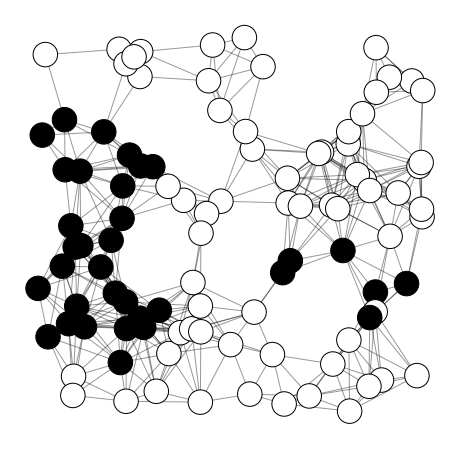

In [11]:
item = 0
activations = np.zeros(N)
active_nodes = [node for _time, node in prop.propagations[item]]
activations[active_nodes] = 1
plot_graph(activations, plt.cm.binary)

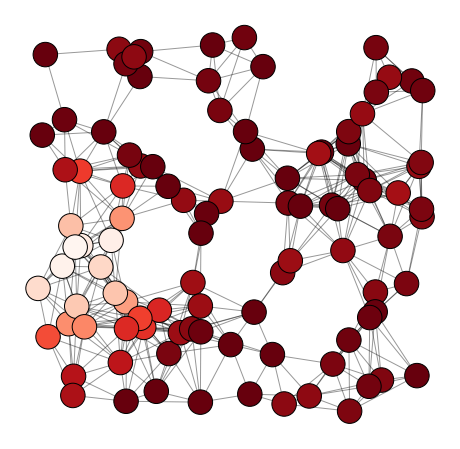

In [12]:
component = np.argmax(prop.topic_distributions[:,item])
component_interest = [prop.interests[component,node] for node in range(N)]
plot_graph(component_interest, plt.cm.Reds_r)

In [ ]:
! rm -r ../Output/